<h1>Interpolate FP cost term data</h1>

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
sns.set()
pd.options.display.max_rows = 100

df = pd.read_csv('CR_COST_FP.csv', converters={'PARTY_ID': str, 'COM_ID': str, 'CNTR_SIZE': str})
df['POD'] = pd.to_datetime(df['POD'])
df['ENCODED_TYPE'] = df['ENCODED_TYPE'].fillna(-1).astype(int)
df = df.dropna(subset=['ENCODED_TYPE'])
df['RATE'] = df['RATE'].fillna(-1).astype(int)
df = df.dropna(subset=['RATE'])
df['ENCODED_TYPE'] = df['ENCODED_TYPE'].astype(int)


df.head()
df.info()
print(f'Dataset size: {df.shape}')


,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,COST_TERM,RATE,ENCODED_TYPE,ENCODED_TERM,POD_ID_EN
0,010,01004906,1004906,MEDITERRANEAN SHIPPING COMPANY S.E.A (SINGAPOR...,ECS010060200592,20060303,LKCMB,COLOMBO,2006-03-03,CTNR010060300015,40,HC,FP,650,1,2,2.432422e+09
1,010,01008573,1008573,WAN HAI INTERNATIONAL PTE LTD,ECS010060200181,20060305,JPOSA,OSAKA,2006-03-05,CTNR010060300111,20,GP,FP,370,2,2,9.123643e+08
2,010,01005114,1005114,KMTC (SINGAPORE) PTE LTD,ECS010060200248,20060305,IDSUB,SURABAYA,2006-03-05,CTNR010060300075,20,GP,FP,120,2,2,8.550661e+08
3,010,01005114,1005114,KMTC (SINGAPORE) PTE LTD,ECS010060200262,20060306,INNSA,NHAVA SHEVA ( JNPT ),2006-03-06,CTNR010060300081,40,HC,FP,1100,1,2,1.337392e+09
4,010,01004690,1004690,MAERSK SINGAPORE PTE LTD,ECS010060100367,20060221,MXZLO,"MANZANILLO , MEXICO",2006-02-21,CTNR010060200515,40,HC NOR,FP,3500,4,2,2.460062e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48407 entries, 0 to 48406
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        48407 non-null  object        
 1   PARTY_ID      48407 non-null  object        
 2   PARTY_ID_EN   48407 non-null  int64         
 3   PARTY_NAME    48407 non-null  object        
 4   CSL_ID        48407 non-null  object        
 5   ETA_ETD_NO    48407 non-null  int64         
 6   ETD_POL_D     48407 non-null  object        
 7   POD_ID        48299 non-null  object        
 8   POD           48407 non-null  datetime64[ns]
 9   CNTR_ID       48407 non-null  object        
 10  CNTR_SIZE     48407 non-null  object        
 11  CNTR_TYPE     48404 non-null  object        
 12  COST_TERM     48407 non-null  object        
 13  RATE          48407 non-null  int32         
 14  ENCODED_TYPE  48407 non-null  int32         
 15  ENCODED_TERM  48407 non-null  int64 

<h4>Checking if dataset still contains any NAN values after datacleaning using SQL</h4>

In [41]:
if df.isna().any().any():
    print('Dataframe contains NaN values')
else:
    print('Dataframe does not contain NaN values')

Dataframe contains NaN values


<h4>Removing rows contains NAN values</h4>

In [42]:
df_clean = df.dropna().reset_index(drop=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48296 entries, 0 to 48295
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        48296 non-null  object        
 1   PARTY_ID      48296 non-null  object        
 2   PARTY_ID_EN   48296 non-null  int64         
 3   PARTY_NAME    48296 non-null  object        
 4   CSL_ID        48296 non-null  object        
 5   ETA_ETD_NO    48296 non-null  int64         
 6   ETD_POL_D     48296 non-null  object        
 7   POD_ID        48296 non-null  object        
 8   POD           48296 non-null  datetime64[ns]
 9   CNTR_ID       48296 non-null  object        
 10  CNTR_SIZE     48296 non-null  object        
 11  CNTR_TYPE     48296 non-null  object        
 12  COST_TERM     48296 non-null  object        
 13  RATE          48296 non-null  int32         
 14  ENCODED_TYPE  48296 non-null  int32         
 15  ENCODED_TERM  48296 non-null  int64 

In [43]:
print(df.keys())

Index(['COM_ID', 'PARTY_ID', 'PARTY_ID_EN', 'PARTY_NAME', 'CSL_ID',
       'ETA_ETD_NO', 'ETD_POL_D', 'POD_ID', 'POD', 'CNTR_ID', 'CNTR_SIZE',
       'CNTR_TYPE', 'COST_TERM', 'RATE', 'ENCODED_TYPE', 'ENCODED_TERM',
       'POD_ID_EN'],
      dtype='object')


In [44]:
sel_col = ['COM_ID', 'PARTY_ID', 'PARTY_ID_EN', 'PARTY_NAME', 'CSL_ID',
       'ETA_ETD_NO', 'ETD_POL_D', 'POD_ID', 'POD', 'CNTR_ID', 'CNTR_SIZE',
       'CNTR_TYPE', 'RATE', 'ENCODED_TYPE','POD_ID_EN']

df_fp = df_clean[sel_col]
df_fp.head()
df_fp.info()

,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,RATE,ENCODED_TYPE,POD_ID_EN
0,010,01004906,1004906,MEDITERRANEAN SHIPPING COMPANY S.E.A (SINGAPOR...,ECS010060200592,20060303,LKCMB,COLOMBO,2006-03-03,CTNR010060300015,40,HC,650,1,2.432422e+09
1,010,01008573,1008573,WAN HAI INTERNATIONAL PTE LTD,ECS010060200181,20060305,JPOSA,OSAKA,2006-03-05,CTNR010060300111,20,GP,370,2,9.123643e+08
2,010,01005114,1005114,KMTC (SINGAPORE) PTE LTD,ECS010060200248,20060305,IDSUB,SURABAYA,2006-03-05,CTNR010060300075,20,GP,120,2,8.550661e+08
3,010,01005114,1005114,KMTC (SINGAPORE) PTE LTD,ECS010060200262,20060306,INNSA,NHAVA SHEVA ( JNPT ),2006-03-06,CTNR010060300081,40,HC,1100,1,1.337392e+09
4,010,01004690,1004690,MAERSK SINGAPORE PTE LTD,ECS010060100367,20060221,MXZLO,"MANZANILLO , MEXICO",2006-02-21,CTNR010060200515,40,HC NOR,3500,4,2.460062e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48296 entries, 0 to 48295
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        48296 non-null  object        
 1   PARTY_ID      48296 non-null  object        
 2   PARTY_ID_EN   48296 non-null  int64         
 3   PARTY_NAME    48296 non-null  object        
 4   CSL_ID        48296 non-null  object        
 5   ETA_ETD_NO    48296 non-null  int64         
 6   ETD_POL_D     48296 non-null  object        
 7   POD_ID        48296 non-null  object        
 8   POD           48296 non-null  datetime64[ns]
 9   CNTR_ID       48296 non-null  object        
 10  CNTR_SIZE     48296 non-null  object        
 11  CNTR_TYPE     48296 non-null  object        
 12  RATE          48296 non-null  int32         
 13  ENCODED_TYPE  48296 non-null  int32         
 14  POD_ID_EN     48296 non-null  float64       
dtypes: datetime64[ns](1), float64(1), in

In [45]:
# interpolate missing values
df_fp['POD'].dt.year.unique()

array([2006, 2005, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2018, 2019, 2020, 2021, 2016, 2017, 2022, 2023], dtype=int64)

In [46]:
# Sorting by date so can interpolate the missing dates while using cost median 
df_fp = df_fp.sort_values(by='POD').reset_index()
df_fp.head()
df_fp['POD'].dt.year.unique()

,index,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,RATE,ENCODED_TYPE,POD_ID_EN
0,1351,010,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS01050600041,20050715,NZAKL,AUCKLAND,2005-07-15,CTNR010050700351,40,HC NOR,4070,4,2.397848e+09
1,2144,010,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,ECS01050600193,20050715,DEHAM,HAMBURG,2005-07-15,CTNR010050700352,20,GP,900,2,5.185729e+08
2,3627,010,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,ECS01050600053,20050715,TWKEL,KEELUNG,2005-07-15,CTNR010050700378,20,GP,200,2,2.562089e+09
3,2643,010,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,ECS01050600058,20050715,TWKHH,KAOHSIUNG,2005-07-15,CTNR010050700371,20,GP,200,2,1.952509e+09
4,3481,010,01003047,1003047,HANJIN SHIPPING (S) PTE LTD,ECS01050700012,20050715,IDJKT,JAKARTA,2005-07-15,CTNR010050700367,40,HC,60,1,2.909437e+09


array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

<h3>Interpolate to fill the missing data gap</h3>

<Axes: xlabel='POD'>

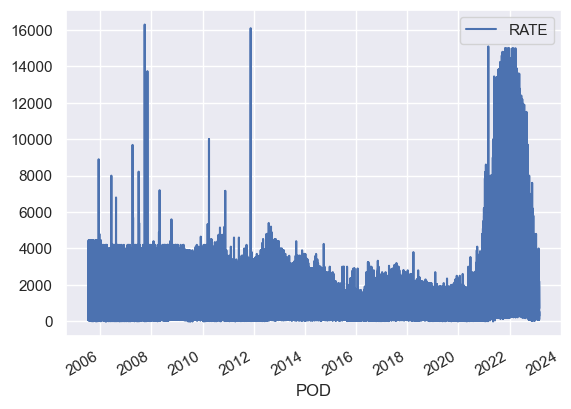

In [47]:
interpolated_data = df_fc.interpolate(method='ffill')
interpolated_data.plot(x='POD', y='RATE')
plt.show()

In [48]:
# Removing rows that contains year 2002
df2 = interpolated_data.loc[interpolated_data['POD'].dt.year != 2002].reset_index(drop=True)
df2.head()
df2.info()

,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,RATE,ENCODED_TYPE,POD_ID_EN
0,010,01004906,1004906,MEDITERRANEAN SHIPPING COMPANY S.E.A (SINGAPOR...,ECS010060200592,20060303,LKCMB,COLOMBO,2006-03-03,CTNR010060300015,40,HC,650,1,2.432422e+09
1,010,01008573,1008573,WAN HAI INTERNATIONAL PTE LTD,ECS010060200181,20060305,JPOSA,OSAKA,2006-03-05,CTNR010060300111,20,GP,370,2,9.123643e+08
2,010,01005114,1005114,KMTC (SINGAPORE) PTE LTD,ECS010060200248,20060305,IDSUB,SURABAYA,2006-03-05,CTNR010060300075,20,GP,120,2,8.550661e+08
3,010,01005114,1005114,KMTC (SINGAPORE) PTE LTD,ECS010060200262,20060306,INNSA,NHAVA SHEVA ( JNPT ),2006-03-06,CTNR010060300081,40,HC,1100,1,1.337392e+09
4,010,01004690,1004690,MAERSK SINGAPORE PTE LTD,ECS010060100367,20060221,MXZLO,"MANZANILLO , MEXICO",2006-02-21,CTNR010060200515,40,HC NOR,3500,4,2.460062e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48296 entries, 0 to 48295
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        48296 non-null  object        
 1   PARTY_ID      48296 non-null  object        
 2   PARTY_ID_EN   48296 non-null  int64         
 3   PARTY_NAME    48296 non-null  object        
 4   CSL_ID        48296 non-null  object        
 5   ETA_ETD_NO    48296 non-null  int64         
 6   ETD_POL_D     48296 non-null  object        
 7   POD_ID        48296 non-null  object        
 8   POD           48296 non-null  datetime64[ns]
 9   CNTR_ID       48296 non-null  object        
 10  CNTR_SIZE     48296 non-null  object        
 11  CNTR_TYPE     48296 non-null  object        
 12  RATE          48296 non-null  int32         
 13  ENCODED_TYPE  48296 non-null  int32         
 14  POD_ID_EN     48296 non-null  float64       
dtypes: datetime64[ns](1), float64(1), in

<Axes: xlabel='POD'>

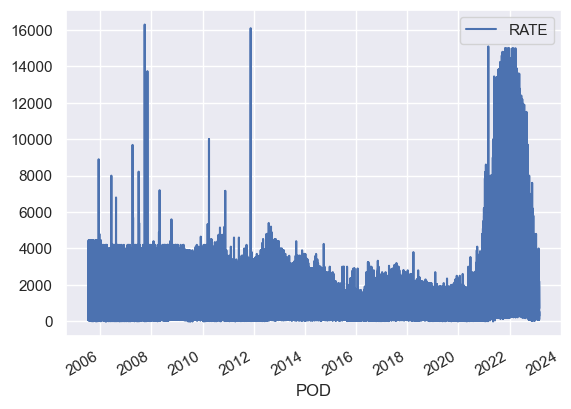

In [49]:
df2.plot(x='POD', y='RATE')
plt.show()

In [50]:
# Checking for negative cost rate
for values in df2['RATE']:
    if values <= 0:
        print(values)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [51]:
df3 = df2.loc[df2['RATE'] > 0].reset_index(drop=True)
df3.head()
df3.info()

,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,POD,CNTR_ID,CNTR_SIZE,CNTR_TYPE,RATE,ENCODED_TYPE,POD_ID_EN
0,010,01004906,1004906,MEDITERRANEAN SHIPPING COMPANY S.E.A (SINGAPOR...,ECS010060200592,20060303,LKCMB,COLOMBO,2006-03-03,CTNR010060300015,40,HC,650,1,2.432422e+09
1,010,01008573,1008573,WAN HAI INTERNATIONAL PTE LTD,ECS010060200181,20060305,JPOSA,OSAKA,2006-03-05,CTNR010060300111,20,GP,370,2,9.123643e+08
2,010,01005114,1005114,KMTC (SINGAPORE) PTE LTD,ECS010060200248,20060305,IDSUB,SURABAYA,2006-03-05,CTNR010060300075,20,GP,120,2,8.550661e+08
3,010,01005114,1005114,KMTC (SINGAPORE) PTE LTD,ECS010060200262,20060306,INNSA,NHAVA SHEVA ( JNPT ),2006-03-06,CTNR010060300081,40,HC,1100,1,1.337392e+09
4,010,01004690,1004690,MAERSK SINGAPORE PTE LTD,ECS010060100367,20060221,MXZLO,"MANZANILLO , MEXICO",2006-02-21,CTNR010060200515,40,HC NOR,3500,4,2.460062e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48274 entries, 0 to 48273
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   COM_ID        48274 non-null  object        
 1   PARTY_ID      48274 non-null  object        
 2   PARTY_ID_EN   48274 non-null  int64         
 3   PARTY_NAME    48274 non-null  object        
 4   CSL_ID        48274 non-null  object        
 5   ETA_ETD_NO    48274 non-null  int64         
 6   ETD_POL_D     48274 non-null  object        
 7   POD_ID        48274 non-null  object        
 8   POD           48274 non-null  datetime64[ns]
 9   CNTR_ID       48274 non-null  object        
 10  CNTR_SIZE     48274 non-null  object        
 11  CNTR_TYPE     48274 non-null  object        
 12  RATE          48274 non-null  int32         
 13  ENCODED_TYPE  48274 non-null  int32         
 14  POD_ID_EN     48274 non-null  float64       
dtypes: datetime64[ns](1), float64(1), in

(array([ 9.94870807,  8.73186032,  6.54110273, ..., 11.56730469,
        9.37151042, 11.20742736]), 0.12424088949081721)


(array([[3.2000e+01, 3.6800e+02, 7.6600e+02, 7.4080e+03, 1.0155e+04,
         1.0803e+04, 1.3650e+04, 3.7310e+03, 8.4800e+02, 5.1300e+02],
        [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
         0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]]),
 array([ 0.        ,  1.88083602,  3.76167205,  5.64250807,  7.5233441 ,
         9.40418012, 11.28501615, 13.16585217, 15.04668819, 16.92752422,
        18.80836024]),
 <a list of 2 BarContainer objects>)

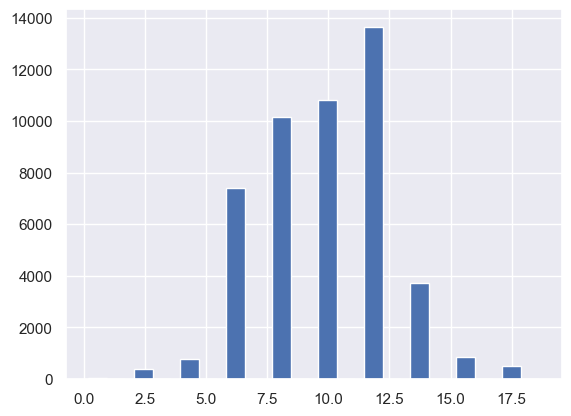

In [52]:
from scipy.stats import boxcox

# Doing symmetric distribution to determine to agg duplicated cost rate on the same date using mean or median
lambda_ = boxcox(df3['RATE'])
print(lambda_)
plt.hist(lambda_, bins=10)
plt.show()

<p>Negatively skewed data, it is usually recommended to use the median as the measure of central tendency instead of the mean. </p>

In [53]:
aggregation = {'RATE': 'median',
               'COM_ID': lambda x: x.iloc[0], 
               'PARTY_ID': lambda x: x.iloc[0], 
               'PARTY_ID_EN': lambda x: x.iloc[0], 
               'PARTY_NAME': lambda x: x.iloc[0], 
               'CSL_ID': lambda x: x.iloc[0],
              'ETA_ETD_NO': lambda x: x.iloc[0], 
              'ETD_POL_D': lambda x: x.iloc[0], 
              'POD_ID': lambda x: x.iloc[0], 
              'CNTR_ID': lambda x: x.iloc[0], 
              'CNTR_SIZE': lambda x: x.iloc[0],
              'CNTR_TYPE': lambda x: x.iloc[0], 
              'ENCODED_TYPE': lambda x: x.iloc[0], 
              'POD_ID_EN': lambda x: x.iloc[0]
}

# perform the aggregation and reset the index
df4 = df3.groupby('POD').agg(aggregation).reset_index()
df4.head()
df4.info()

,POD,RATE,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,CNTR_ID,CNTR_SIZE,CNTR_TYPE,ENCODED_TYPE,POD_ID_EN
0,2005-07-15,200.0,010,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS01050600041,20050715,NZAKL,AUCKLAND,CTNR010050700351,40,HC NOR,4,2.397848e+09
1,2005-07-16,930.0,010,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,ECS01050600202,20050716,TRIST,ISTANBUL(HAYDARPASA),CTNR010050700509,20,GP,2,7.237985e+08
2,2005-07-17,650.0,010,01001118,1001118,CASH-FORWARDER A/C,ECS01050600613,20050717,CNTXG,XINGANG,CTNR010050700434,40,HC,1,1.774015e+09
3,2005-07-18,2275.0,010,01000054,1000054,ABC EUROPEAN AIR & SEA CARGO DISTRIBUTION-SLOV...,ECS01050600365,20050718,SKBTS,BRATISLAVA,CTNR010050700438,40,HC,1,3.383204e+09
4,2005-07-19,1350.0,010,01002215,1002215,EVERGREEN INTERNATIONAL S.A.,ECS01050600264,20050719,JOAQB,AQABA,CTNR010050700501,20,GP,2,2.177327e+09


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6301 entries, 0 to 6300
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   POD           6301 non-null   datetime64[ns]
 1   RATE          6301 non-null   float64       
 2   COM_ID        6301 non-null   object        
 3   PARTY_ID      6301 non-null   object        
 4   PARTY_ID_EN   6301 non-null   int64         
 5   PARTY_NAME    6301 non-null   object        
 6   CSL_ID        6301 non-null   object        
 7   ETA_ETD_NO    6301 non-null   int64         
 8   ETD_POL_D     6301 non-null   object        
 9   POD_ID        6301 non-null   object        
 10  CNTR_ID       6301 non-null   object        
 11  CNTR_SIZE     6301 non-null   object        
 12  CNTR_TYPE     6301 non-null   object        
 13  ENCODED_TYPE  6301 non-null   int32         
 14  POD_ID_EN     6301 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int3

<Axes: xlabel='POD'>

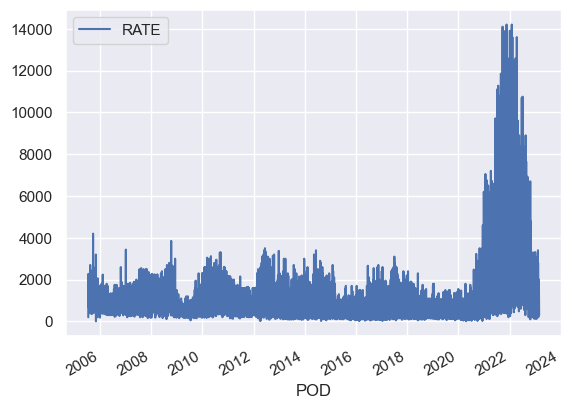

In [54]:
df4.plot(x='POD', y='RATE')
plt.show()

<h3>Casting All to INT32 Type</h3>

In [55]:
df4['CNTR_SIZE'] = df4['CNTR_SIZE'].astype(np.int32)
df4['RATE'] = df4['RATE'].astype(np.int32)
df4['PARTY_ID_EN'] = df4['PARTY_ID_EN'].astype(np.int32)
df4['ETA_ETD_NO'] = df4['ETA_ETD_NO'].astype(np.int32)
df4.info()
df4.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6301 entries, 0 to 6300
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   POD           6301 non-null   datetime64[ns]
 1   RATE          6301 non-null   int32         
 2   COM_ID        6301 non-null   object        
 3   PARTY_ID      6301 non-null   object        
 4   PARTY_ID_EN   6301 non-null   int32         
 5   PARTY_NAME    6301 non-null   object        
 6   CSL_ID        6301 non-null   object        
 7   ETA_ETD_NO    6301 non-null   int32         
 8   ETD_POL_D     6301 non-null   object        
 9   POD_ID        6301 non-null   object        
 10  CNTR_ID       6301 non-null   object        
 11  CNTR_SIZE     6301 non-null   int32         
 12  CNTR_TYPE     6301 non-null   object        
 13  ENCODED_TYPE  6301 non-null   int32         
 14  POD_ID_EN     6301 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int3

,POD,RATE,COM_ID,PARTY_ID,PARTY_ID_EN,PARTY_NAME,CSL_ID,ETA_ETD_NO,ETD_POL_D,POD_ID,CNTR_ID,CNTR_SIZE,CNTR_TYPE,ENCODED_TYPE,POD_ID_EN
0,2005-07-15,200,010,01005136,1005136,MONDIALE FREIGHT SERVICES LIMITED-AUCKLAND,ECS01050600041,20050715,NZAKL,AUCKLAND,CTNR010050700351,40,HC NOR,4,2.397848e+09
1,2005-07-16,930,010,01008827,1008827,YANG MING (SINGAPORE) PTE. LTD.,ECS01050600202,20050716,TRIST,ISTANBUL(HAYDARPASA),CTNR010050700509,20,GP,2,7.237985e+08
2,2005-07-17,650,010,01001118,1001118,CASH-FORWARDER A/C,ECS01050600613,20050717,CNTXG,XINGANG,CTNR010050700434,40,HC,1,1.774015e+09
3,2005-07-18,2275,010,01000054,1000054,ABC EUROPEAN AIR & SEA CARGO DISTRIBUTION-SLOV...,ECS01050600365,20050718,SKBTS,BRATISLAVA,CTNR010050700438,40,HC,1,3.383204e+09
4,2005-07-19,1350,010,01002215,1002215,EVERGREEN INTERNATIONAL S.A.,ECS01050600264,20050719,JOAQB,AQABA,CTNR010050700501,20,GP,2,2.177327e+09


<h4>Removing Dates from 2023 onwards as 2023 is used to test test the accuracy of the cost rate forecast.</h4>

In [56]:
# Filter out the rows with a date in 2023
df_before_2023 = df4[df4['POD'] < '2023-01-01'].reset_index(drop=True)
df_2023_and_after = df4[df4['POD'] >= '2023-01-01'].reset_index(drop=True)

In [57]:
df_before_2023.info()
df_before_2023.to_csv('CR_FP_PREP_0522.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6249 entries, 0 to 6248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   POD           6249 non-null   datetime64[ns]
 1   RATE          6249 non-null   int32         
 2   COM_ID        6249 non-null   object        
 3   PARTY_ID      6249 non-null   object        
 4   PARTY_ID_EN   6249 non-null   int32         
 5   PARTY_NAME    6249 non-null   object        
 6   CSL_ID        6249 non-null   object        
 7   ETA_ETD_NO    6249 non-null   int32         
 8   ETD_POL_D     6249 non-null   object        
 9   POD_ID        6249 non-null   object        
 10  CNTR_ID       6249 non-null   object        
 11  CNTR_SIZE     6249 non-null   int32         
 12  CNTR_TYPE     6249 non-null   object        
 13  ENCODED_TYPE  6249 non-null   int32         
 14  POD_ID_EN     6249 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int3

In [58]:
df_2023_and_after.info()
df_2023_and_after.to_csv('CR_FP_PREP_23.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   POD           52 non-null     datetime64[ns]
 1   RATE          52 non-null     int32         
 2   COM_ID        52 non-null     object        
 3   PARTY_ID      52 non-null     object        
 4   PARTY_ID_EN   52 non-null     int32         
 5   PARTY_NAME    52 non-null     object        
 6   CSL_ID        52 non-null     object        
 7   ETA_ETD_NO    52 non-null     int32         
 8   ETD_POL_D     52 non-null     object        
 9   POD_ID        52 non-null     object        
 10  CNTR_ID       52 non-null     object        
 11  CNTR_SIZE     52 non-null     int32         
 12  CNTR_TYPE     52 non-null     object        
 13  ENCODED_TYPE  52 non-null     int32         
 14  POD_ID_EN     52 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int32(5)

<ol>
    <li>There are total of 52 rows of data after and equal year 2023</li>
    <li>There are total of 6249 rows of data before year 2023</li>
<ol>
